In [1]:
#data loading
import pandas as pd
filename="/content/CES11.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames    id province  population   weight  gender abortion  \
0            1  2851       BC     3267345  4287.85  Female       No   
1            2   521       QC     5996930  9230.78    Male       No   
2            3  2118       QC     5996930  6153.85    Male      Yes   
3            4  1815       NL      406455  3430.00  Female       No   
4            5  1799       ON     9439960  8977.61    Male       No   
...        ...   ...      ...         ...      ...     ...      ...   
2226      2227   490       MB      871460  8743.75  Female       No   
2227      2228   781       QC     5996930  6153.85  Female       No   
2228      2229   671       QC     5996930  6153.85    Male       No   
2229      2230  2488       BC     3267345  4287.85  Female       No   
2230      2231  1368       MB      871460  5829.16    Male       No   

     importance  education   type  
0      somewhat     somePS  urban  
1           not  bachelors  urban  
2      somewhat    college  urban  
3  

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
id,0
province,0
population,0
weight,0
gender,0
abortion,0
importance,0
education,0
type,0


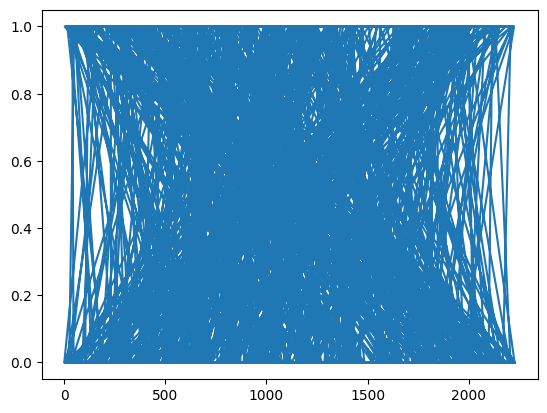

In [14]:
from matplotlib import pyplot as plt
target="abortion"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 2231 artists>

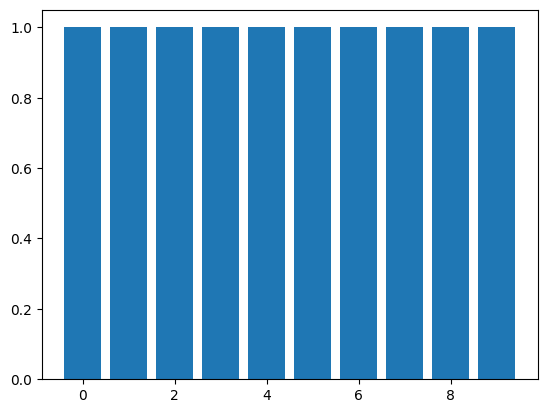

In [15]:
plt.bar(a[a.columns[2]],a[str(target)])

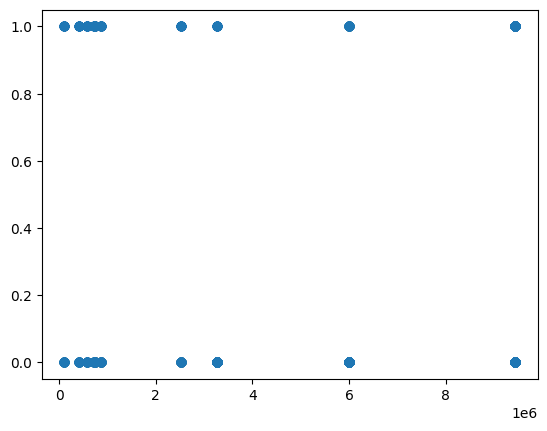

In [16]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={2,5,6,7,8,9}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames    id  province  population  weight  gender  abortion  \
0            1  1863         1     3267345      11       0         0   
1            2   352         8     5996930      26       1         0   
2            3  1404         8     5996930      17       1         1   
3            4  1198         4      406455      10       0         0   
4            5  1187         6     9439960      25       1         0   
...        ...   ...       ...         ...     ...     ...       ...   
2226      2227   324         2      871460      24       0         0   
2227      2228   509         8     5996930      17       0         0   
2228      2229   447         8     5996930      17       1         0   
2229      2230  1640         1     3267345      11       0         0   
2230      2231   899         2      871460      16       1         0   

      importance  education  type  
0              2          5     1  
1              0          1     1  
2              2          2

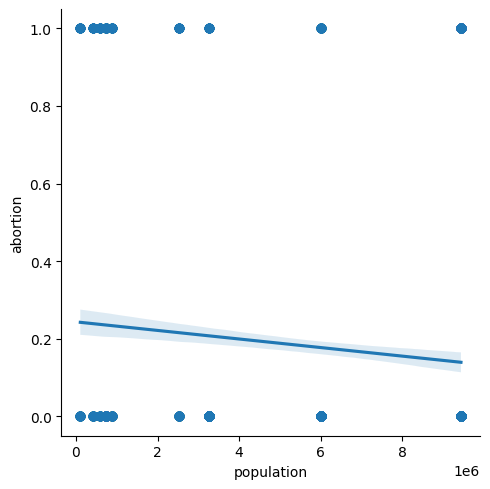

In [18]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="population",y=str(target),data=a)

<Axes: xlabel='gender', ylabel='abortion'>

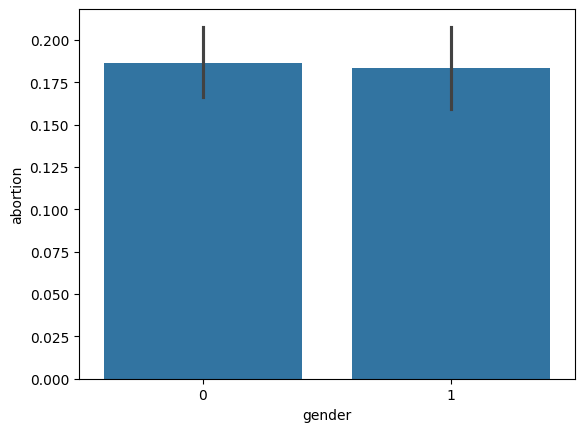

In [19]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='weight', ylabel='abortion'>

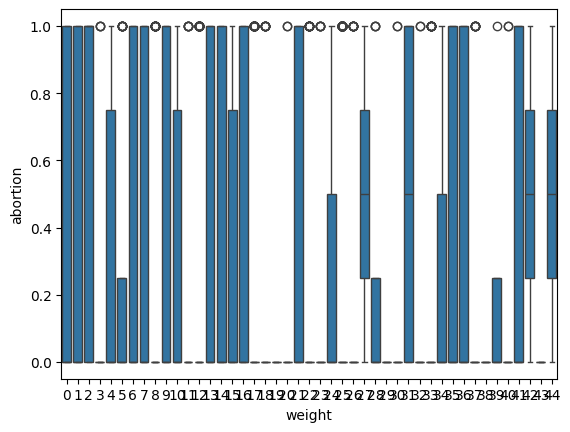

In [20]:
sns.boxplot(x=a.columns[4],y=str(target),data=a)

<ipython-input-21-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='abortion', ylabel='Density'>

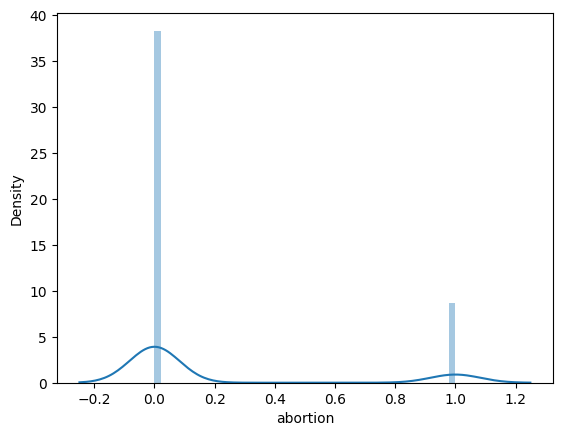

In [21]:
sns.distplot(a[str(target)])

<Axes: xlabel='id', ylabel='Density'>

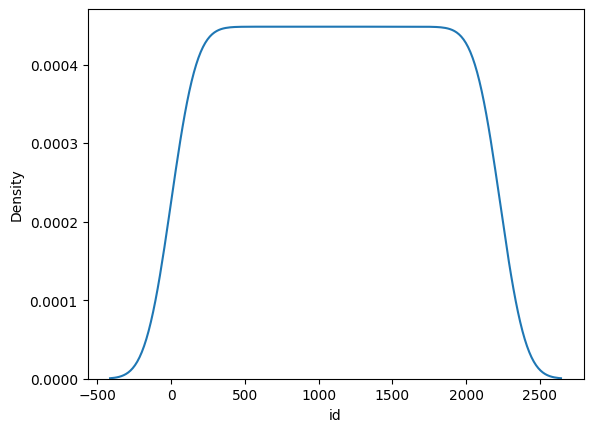

In [22]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='weight', ylabel='count'>

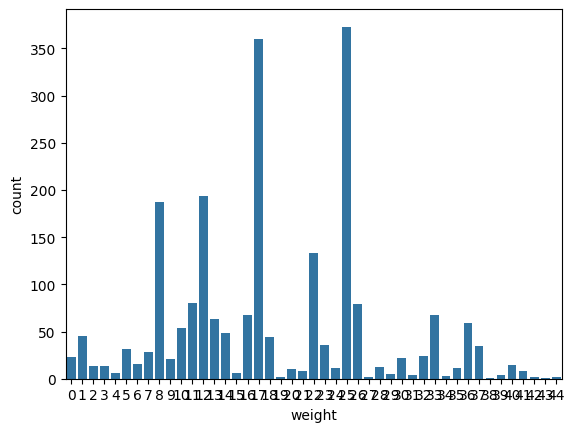

In [23]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

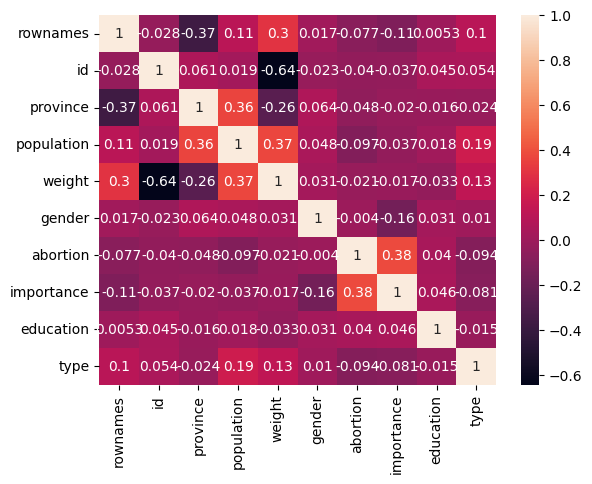

In [25]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()
sns.heatmap(data, annot=True)

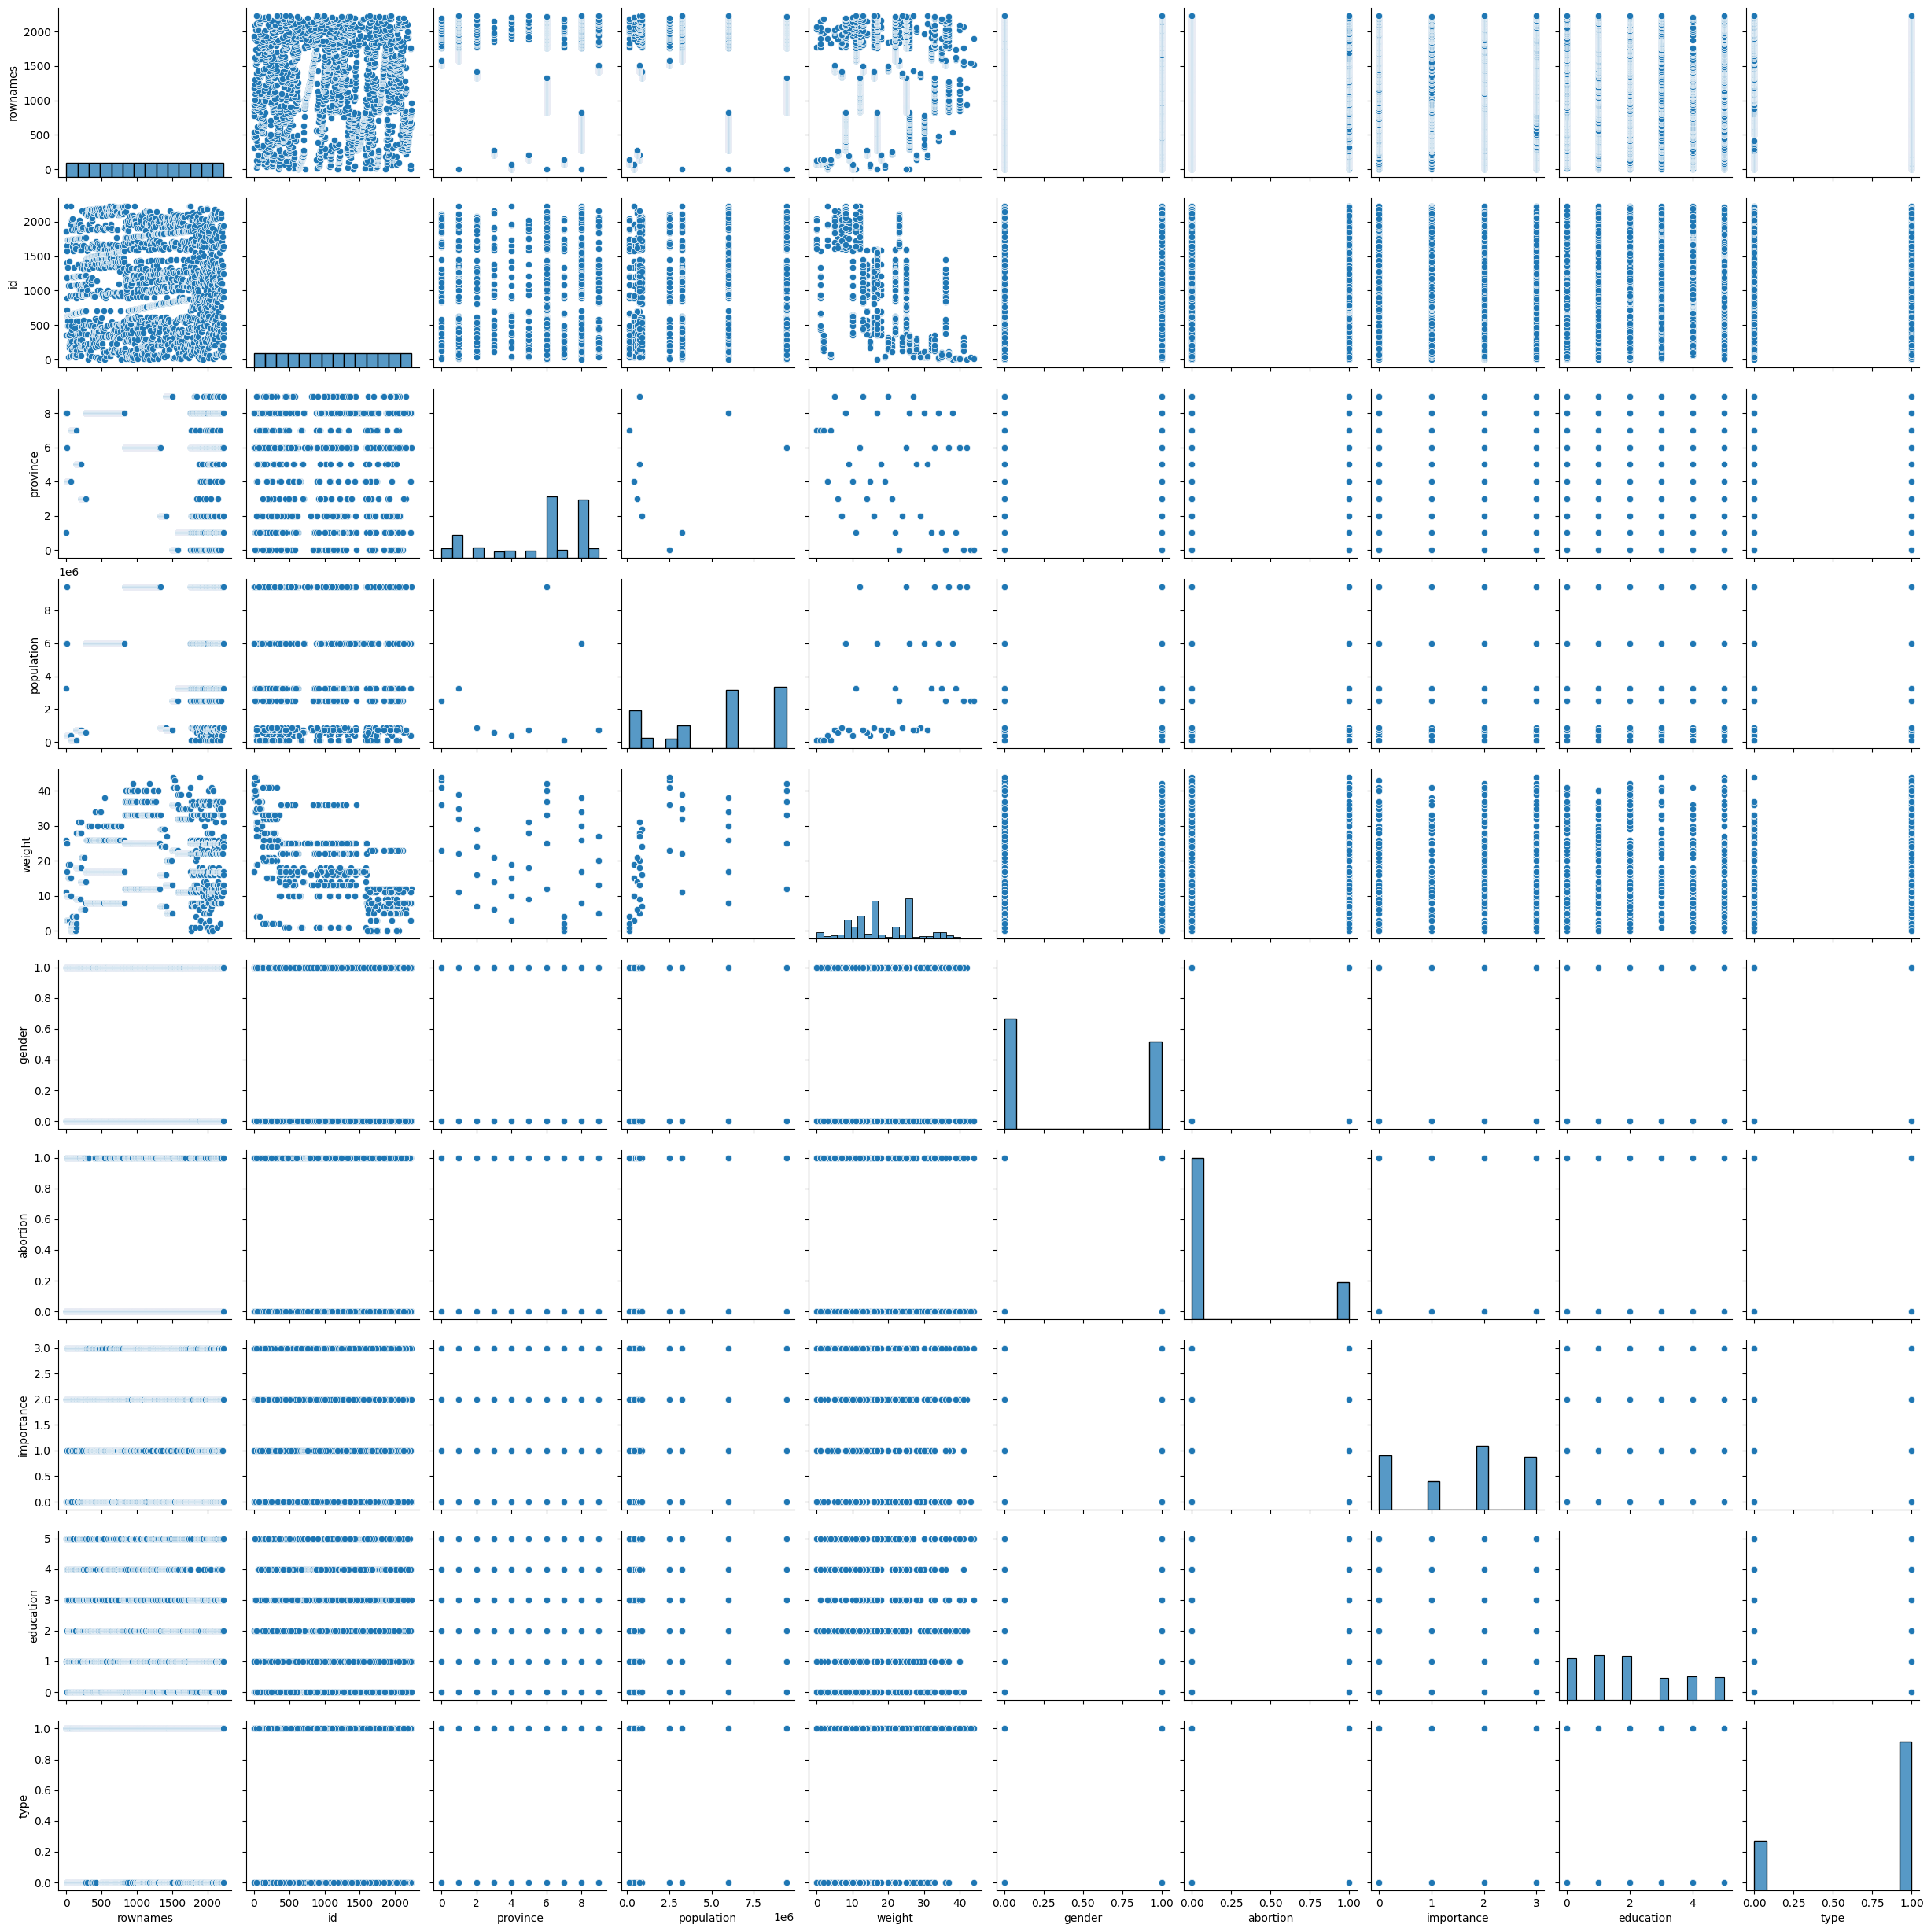

In [26]:
sns.pairplot(data=a)

In [27]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames    id  province  population  weight  gender  importance  \
0            1  1863         1     3267345      11       0           2   
1            2   352         8     5996930      26       1           0   
2            3  1404         8     5996930      17       1           2   
3            4  1198         4      406455      10       0           3   
4            5  1187         6     9439960      25       1           0   
...        ...   ...       ...         ...     ...     ...         ...   
2226      2227   324         2      871460      24       0           2   
2227      2228   509         8     5996930      17       0           2   
2228      2229   447         8     5996930      17       1           2   
2229      2230  1640         1     3267345      11       0           0   
2230      2231   899         2      871460      16       1           0   

      education  type  
0             5     1  
1             1     1  
2             2     1  
3             5

In [28]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
2226    0
2227    0
2228    0
2229    0
2230    0
Name: abortion, Length: 2231, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
print(x_train)

      rownames    id  province  population  weight  gender  importance  \
2181      2182   159         7      105780       2       0           0   
1342      1343  1245         2      871460      16       0           3   
329        330  1385         8     5996930      17       0           0   
1694      1695  1637         1     3267345      11       0           2   
1917      1918    51         6     9439960      37       0           0   
...        ...   ...       ...         ...     ...     ...         ...   
587        588  1007         8     5996930      17       0           0   
698        699  2209         8     5996930       8       0           0   
2050      2051  1989         6     9439960      12       1           3   
820        821  2137         8     5996930       8       0           0   
889        890  1142         6     9439960      25       1           2   

      education  type  
2181          2     0  
1342          0     1  
329           1     1  
1694          0

In [31]:
print(y_train)

2181    1
1342    0
329     0
1694    0
1917    0
       ..
587     0
698     0
2050    0
820     0
889     0
Name: abortion, Length: 1784, dtype: int64


In [32]:
print(x_test)

      rownames    id  province  population  weight  gender  importance  \
1605      1606  1263         1     3267345      22       1           1   
136        137   886         7      105780       1       0           3   
443        444  2095         8     5996930       8       0           2   
1740      1741  2071         1     3267345      11       0           3   
1655      1656   168         1     3267345      32       1           1   
...        ...   ...       ...         ...     ...     ...         ...   
1470      1471  1838         9      734250       5       0           1   
287        288   946         8     5996930      17       1           0   
273        274  1766         8     5996930       8       1           0   
809        810  1571         8     5996930      17       0           1   
1680      1681   866         1     3267345      22       1           0   

      education  type  
1605          1     0  
136           5     0  
443           2     1  
1740          0

In [33]:
print(y_test)

1605    0
136     0
443     0
1740    0
1655    0
       ..
1470    0
287     0
273     0
809     0
1680    0
Name: abortion, Length: 447, dtype: int64


In [34]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [36]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.796420581655481


In [37]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[356   0]
 [ 91   0]]


In [39]:
print(model.predict([[1606,1263,1,3267345,22,1,1,1,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [41]:
print(ypred)

[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0]


In [42]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7718120805369127


In [43]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[309  47]
 [ 55  36]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       356
           1       0.43      0.40      0.41        91

    accuracy                           0.77       447
   macro avg       0.64      0.63      0.64       447
weighted avg       0.76      0.77      0.77       447



In [46]:
print(model.predict([[1606,1263,1,3267345,22,1,1,1,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [48]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0]


In [49]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.8098434004474273


In [50]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[336  20]
 [ 65  26]]


In [51]:
print(model.predict([[1606,1263,1,3267345,22,1,1,1,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       356
           1       0.57      0.29      0.38        91

    accuracy                           0.81       447
   macro avg       0.70      0.61      0.63       447
weighted avg       0.78      0.81      0.78       447

